In [2]:
import sys
sys.path.append("/home/winter/TreeSegment/An-unexpectedly-large-count-of-trees-in-the-western-Sahara-and-Sahel-v1.0.0/notebooks/")
import numpy as np
from PIL import Image
from config.Preprocessing import *
from core.visualize import display_images

In [3]:
config = Configuration(folder="test1")

/home/winter/TreeSegment/resources/test1/results/ndvi_0.png
(4, 1538, 2397)
(4, 1536, 2304)


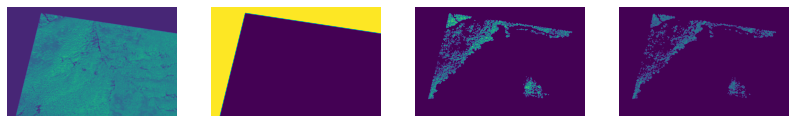

In [4]:
sampleImage = '_0.png'
fn = os.path.join(config.path_to_write, config.extracted_ndvi_filename + sampleImage )
print(fn)

ndvi_img = Image.open(fn)
pan_img = Image.open(fn.replace(config.extracted_ndvi_filename ,config.extracted_pan_filename))
annotation_im = Image.open(fn.replace(config.extracted_ndvi_filename ,config.extracted_annotation_filename))
weight_im = Image.open(fn.replace(config.extracted_ndvi_filename ,config.extracted_boundary_filename))

read_ndvi_img = np.array(ndvi_img)
read_pan_img = np.array(pan_img)
read_annotation = np.array(annotation_im)
read_weight = np.array(weight_im)

all_images = np.array([read_ndvi_img, read_pan_img, read_annotation, read_weight ])
print(all_images.shape)
trim_img = all_images[:,2:,93:]
print(trim_img.shape)

display_images(np.expand_dims(np.transpose(all_images, axes=(1,2,0)), axis=0))
# plt.imshow(read_weight)

In [7]:
row_split_count = 12
col_split_count = 18
split_row = np.split(trim_img, row_split_count, axis=1)
split_col = [np.split(row_img, col_split_count, axis=2) for row_img in split_row]
print(split_col[0][0].shape)
for i in range(12):
    for j in range(18):
        mean_v = np.mean(split_col[i][j][2,:,:])
        if mean_v>0.1: 
            display_images(np.expand_dims(np.transpose(split_col[i][j], axes=(1,2,0)), axis=0))
            print(f"{i},{j} mean: {mean_v}")

(4, 128, 128)
0,2 mean: 0.0010986328125
0,3 mean: 0.08587646484375
0,4 mean: 0.06390380859375
0,5 mean: 0.0032958984375
1,2 mean: 0.0726318359375
1,3 mean: 0.46337890625
1,4 mean: 0.280029296875
1,5 mean: 0.0665283203125
1,6 mean: 0.01708984375
1,7 mean: 0.1568603515625
1,8 mean: 0.19873046875
1,9 mean: 0.093994140625
1,10 mean: 0.07623291015625
1,11 mean: 0.02197265625
2,2 mean: 0.07720947265625
2,3 mean: 0.140869140625
2,4 mean: 0.11566162109375
2,5 mean: 0.13311767578125
2,6 mean: 0.181396484375
2,7 mean: 0.3580322265625
2,8 mean: 0.13018798828125
2,9 mean: 0.1444091796875
2,10 mean: 0.0257568359375
2,11 mean: 0.06707763671875
2,12 mean: 0.1549072265625
2,13 mean: 0.2271728515625
2,14 mean: 0.13568115234375
2,15 mean: 0.1517333984375
2,16 mean: 0.0550537109375
3,2 mean: 0.08795166015625
3,3 mean: 0.11920166015625
3,4 mean: 0.07867431640625
3,5 mean: 0.1988525390625
3,6 mean: 0.3634033203125
3,7 mean: 0.2772216796875
3,9 mean: 0.04193115234375
3,13 mean: 0.0068359375
3,14 mean: 0.081